### Forward Dynamics of Franka Emika `Panda`

In [1]:
import numpy as np
np.set_printoptions(precision=2)
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from mujoco_parser import MuJoCoParserClass
from pid import PID_ControllerClass
print ("Done.")

Done.


### Simulate free-fall motion

In [2]:
env = MuJoCoParserClass(name='Panda',rel_xml_path='../asset/panda/franka_panda.xml',VERBOSE=False)
env.init_viewer(TERMINATE_GLFW=False,INITIALIZE_GLFW=True,window_width=0.5,window_height=0.5)
env.set_max_sec(max_sec=5.0)
# Buffers
sec_list = np.zeros(env.max_tick)
q_list   = np.zeros((env.max_tick,env.n_rev_joint))
while env.IS_ALIVE():
    torque = np.zeros(env.n_rev_joint) # zero torque
    env.step(ctrl=torque,ctrl_idxs=env.rev_joint_idxs) # torque applied to revolute joints
    env.render(render_speedup=1.0,RENDER_ALWAYS=False)
    env.print(print_every_sec=1.0,VERBOSE=1)
    # Append
    sec_list[env.tick-1] = env.get_sec_sim()
    q_list[env.tick-1,:] = env.get_q_pos(q_pos_idxs=env.rev_joint_idxs)
env.terminate_viewer()
env.sleep(1.0)
print ("Done.")

Creating window glfw
tick:[1/2500], sec_wall:[0.557]sec, sec_sim:[0.002]sec
tick:[500/2500], sec_wall:[0.985]sec, sec_sim:[1.000]sec
tick:[1000/2500], sec_wall:[1.882]sec, sec_sim:[2.000]sec
tick:[1500/2500], sec_wall:[2.863]sec, sec_sim:[3.000]sec
tick:[2000/2500], sec_wall:[3.891]sec, sec_sim:[4.000]sec
tick:[2500/2500], sec_wall:[4.921]sec, sec_sim:[5.000]sec
Done.


Creating window glfw
Creating window glfw
Creating offscreen glfw


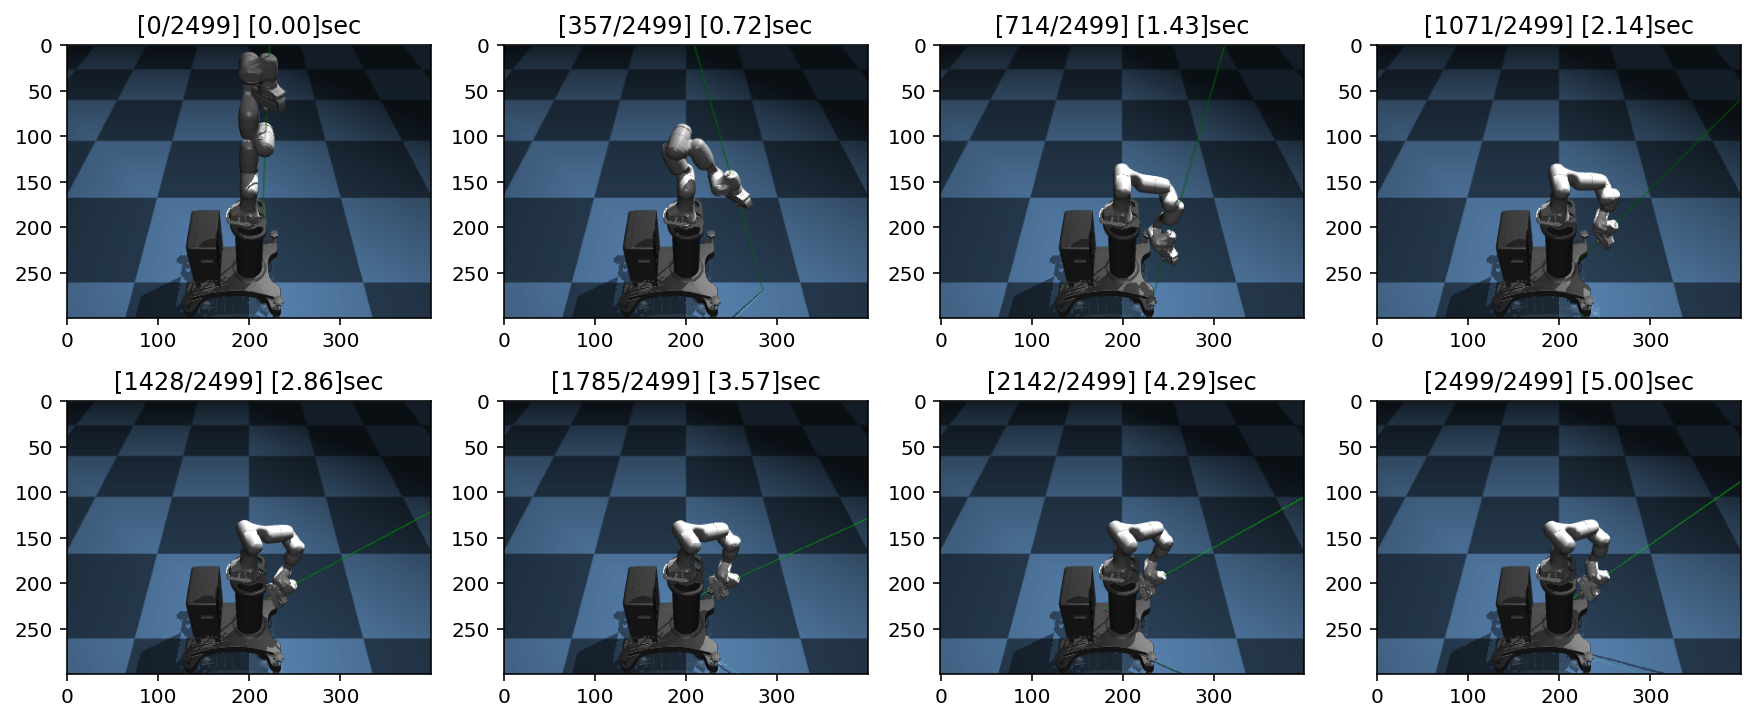

In [3]:
env.init_viewer(TERMINATE_GLFW=True,INITIALIZE_GLFW=True)
fig = plt.figure(figsize=(15,6))
for idx,tick in enumerate(np.linspace(0,env.max_tick-1,8).astype(np.int32)):
    env.forward(q_pos=q_list[tick,:],q_pos_idxs=env.rev_joint_idxs)
    img = env.plot_scene(render_w=400,render_h=300,
                         cam_distance=2.0,cam_elevation=-45,cam_lookat=[0,0,1.25],RETURN_IMG=True)
    ax = fig.add_subplot(2,4,idx+1)
    ax.imshow(img)
    ax.set_title('[%d/%d] [%.2f]sec'%(tick,env.max_tick-1,sec_list[tick]),fontsize=12)

### Apply external force on a body of `Panda`

In [4]:
env = MuJoCoParserClass(name='Panda',rel_xml_path='../asset/panda/franka_panda.xml',VERBOSE=False)
env.init_viewer(TERMINATE_GLFW=True,INITIALIZE_GLFW=True,window_width=0.5,window_height=0.5)
env.set_max_sec(max_sec=5.0)
# Buffers
sec_list = np.zeros(env.max_tick)
q_list   = np.zeros((env.max_tick,env.n_rev_joint))
while env.IS_ALIVE():
    # Apply external force to a body
    body_name = 'panda_eef' # panda_eef / panda_link_4 / panda_link_5 / panda_link_6
    env.apply_extnal_force(body_name=body_name,ft=np.array([100,0,0,0,0,0]))
    env.add_marker(env.get_p_body(body_name),radius=0.1,color=np.array([1,0,0,0.5])) # add marker
    # Update
    torque = np.zeros(env.n_rev_joint) # zero torque
    env.step(ctrl=torque,ctrl_idxs=env.rev_joint_idxs) # torque applied to revolute joints
    env.render(render_speedup=1.0,RENDER_ALWAYS=False)
    env.print(print_every_sec=1.0,VERBOSE=1)
    # Append
    sec_list[env.tick-1] = env.get_sec_sim()
    q_list[env.tick-1,:] = env.get_q_pos(q_pos_idxs=env.rev_joint_idxs)
env.terminate_viewer()
env.sleep(1.0)
print ("Done.")

Creating window glfw
Creating window glfw
tick:[1/2500], sec_wall:[0.681]sec, sec_sim:[0.002]sec
tick:[500/2500], sec_wall:[0.982]sec, sec_sim:[1.000]sec
tick:[1000/2500], sec_wall:[1.885]sec, sec_sim:[2.000]sec
tick:[1500/2500], sec_wall:[2.932]sec, sec_sim:[3.000]sec
tick:[2000/2500], sec_wall:[3.954]sec, sec_sim:[4.000]sec
tick:[2500/2500], sec_wall:[4.968]sec, sec_sim:[5.000]sec
Done.


Creating window glfw
Creating window glfw
Creating offscreen glfw


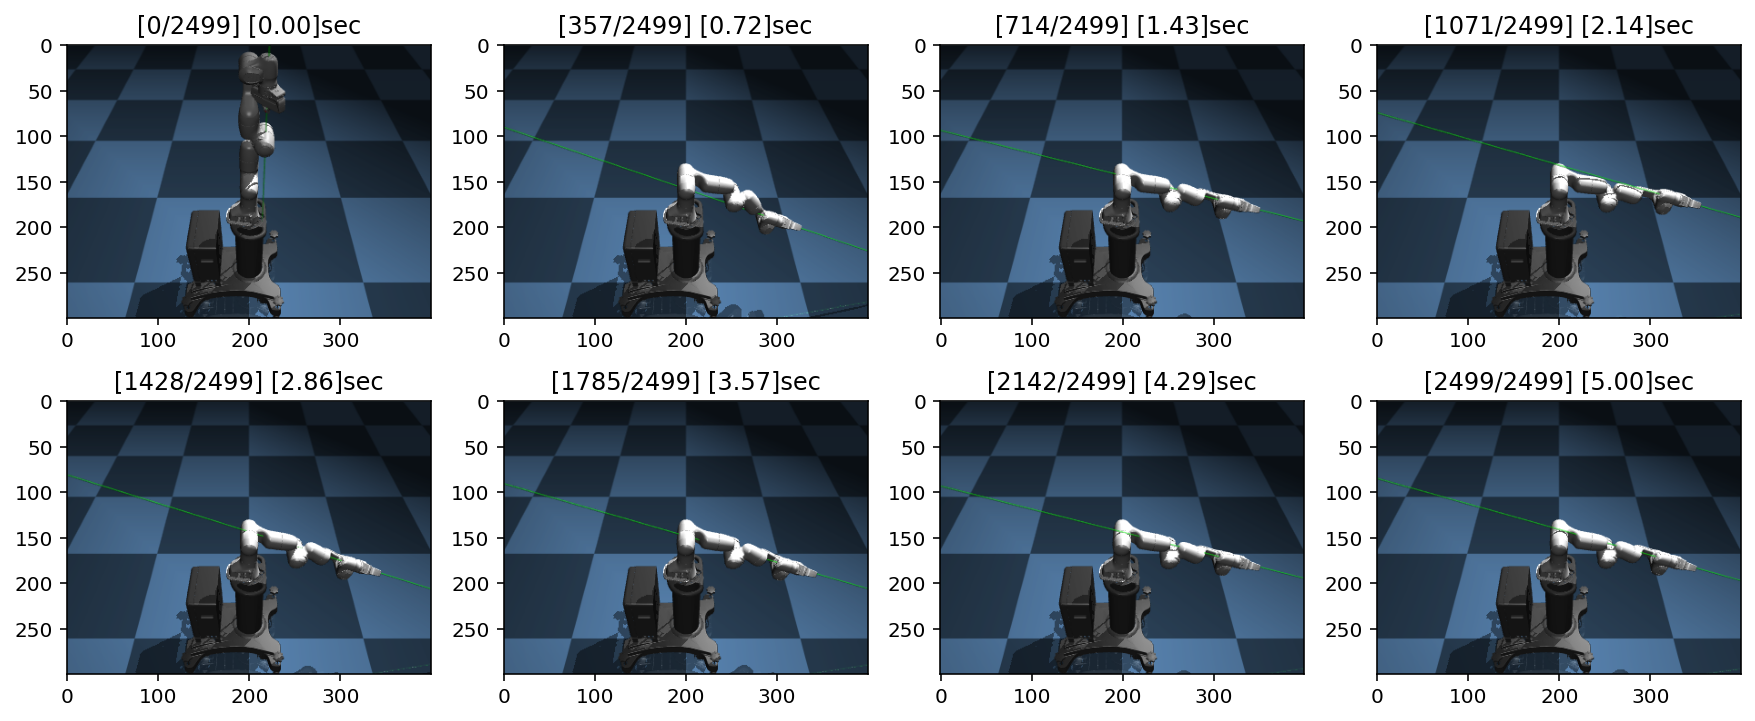

In [5]:
env.init_viewer(TERMINATE_GLFW=True,INITIALIZE_GLFW=True)
fig = plt.figure(figsize=(15,6))
for idx,tick in enumerate(np.linspace(0,env.max_tick-1,8).astype(np.int32)):
    env.forward(q_pos=q_list[tick,:],q_pos_idxs=env.rev_joint_idxs)
    img = env.plot_scene(render_w=400,render_h=300,
                         cam_distance=2.0,cam_elevation=-45,cam_lookat=[0,0,1.25],RETURN_IMG=True)
    ax = fig.add_subplot(2,4,idx+1)
    ax.imshow(img)
    ax.set_title('[%d/%d] [%.2f]sec'%(tick,env.max_tick-1,sec_list[tick]),fontsize=12)